In [3]:
# Comparison of fragmentation rate constants
# Load and display the data
import pandas as pd
file_path = "/Users/elchulito/Library/CloudStorage/OneDrive-polymtl/PlasticFADE.xlsx"  # CHECK: confirm file path
sheet_name = "Fig.5"
data = pd.read_excel(file_path, sheet_name=sheet_name, usecols='A,G,I:K', skiprows=1, nrows=16)
data_frag = data.iloc[0:8, ]
pd.set_option('display.float_format', '{:.2e}'.format)
print(data_frag)

                   Model input  k_liter [d-1]  k_m_LL [d-1]  k_model [d-1]  \
0      N.S., Micro, N.S., Wsur       2.33e-03      6.12e-09       2.59e-05   
1      N.S., Micro, N.S., TopS       2.33e-03      5.75e-09       2.59e-05   
2      N.S., Micro, N.S., Sedm       2.33e-03      0.00e+00       0.00e+00   
3  N.S., 1000 μm, Sphere, WSur       2.74e-02      2.46e-08       5.26e-04   
4  N.S., 1000 μm, Sphere, WCol       2.74e-03      8.17e-18       9.39e-09   
5  N.S., 1000 μm, Sphere, Sedm       2.74e-03      0.00e+00       0.00e+00   
6       PP, Micro, Sphere, N/A       5.48e-05      5.66e-08       1.65e-04   
7       PP, Micro, Sphere, N/A       5.10e-06      3.14e-08       1.63e-04   

   k_m_UL [d-1]  
0      4.10e+00  
1      2.06e+00  
2      0.00e+00  
3      4.84e+02  
4      7.26e-01  
5      0.00e+00  
6      3.53e+00  
7      3.30e+00  


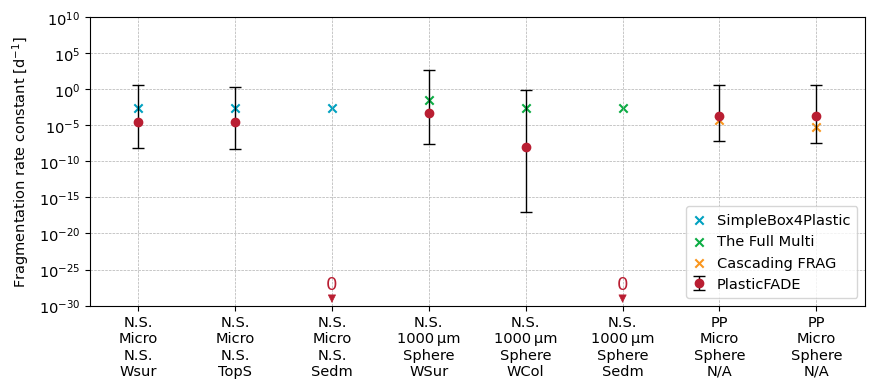

In [71]:
# Plot PlasticFADE outputs together with estimates from existing models (Fragmentation)
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import numpy as np

fig, ax = plt.subplots(figsize=(10, 3.75))
x = np.arange(len(data_frag))
y = data_frag['k_model [d-1]']
yerr_lower = y - data_frag['k_m_LL [d-1]']
yerr_upper = data_frag['k_m_UL [d-1]'] - y
yerr = [yerr_lower, yerr_upper]
y1 = data_frag['k_liter [d-1]'].iloc[0:3, ]
y2 = data_frag['k_liter [d-1]'].iloc[3:6, ]
y3 = data_frag['k_liter [d-1]'].iloc[6:8, ]

# Plot k_model with error bars
errorbar_plot = ax.errorbar(x, y, yerr=yerr, fmt='o', color='#B91E32', ecolor='black',
            elinewidth=1, capsize=4, markersize=6, label='PlasticFADE')
# Plot k_literature as blue crosses
h1 = plt.scatter(x[:3], y1, color='#00A1C0', marker='x', label='SimpleBox4Plastic')
h2 = plt.scatter(x[3:6], y2, color='#0BAC43', marker='x', label='The Full Multi')
h3 = plt.scatter(x[-2:], y3, color='#FA961E', marker='x', label='Cascading FRAG')

# Show the outliers ("zero" values)
min_display_y = 1e-30
for i in range(len(data_frag)):
    y_val = y.iloc[i]
    if y_val < min_display_y:
        y_zero_marker = min_display_y * 1  # Position arrow slightly above the bottom limit
        y_zero_label = y_zero_marker * 50  # Adjust the margin between text and arrow
        plt.annotate(
            '0', 
            xy=(i, y_zero_marker),       # Position the arrow tip
            xytext=(i, y_zero_label),  # Position the text above the arrow
            textcoords='data',
            ha='center',
            va='bottom',
            fontsize=13,
            color='#B91E32',
            arrowprops=dict(arrowstyle='-|>', color='#B91E32', lw=0.5),
            clip_on=False
        )

ax.set_xticks(x)
labels = data_frag['Model input'].str.replace(', ', '\n').str.replace(' ', '\u2009')
ax.set_xticklabels(labels)
ax.set_yscale('log')
ax.set_ylabel('Fragmentation rate constant [d$^{-1}$]', labelpad=5, fontsize=10.5)
ax.tick_params(axis='both', which='major', labelsize=10.5)
plt.xlim(-0.5, len(x) - 0.5)  # Pull the first and last data points closer to the edge of the plot
plt.ylim(1e-30, 1e+10)  # Set y-axis limits manually
plt.gca().yaxis.set_major_locator(FixedLocator([10**exp for exp in range(-30, 11, 5)]))  # Manually set the tick positions at every 1e5
plt.grid(True, which="major", ls="--", lw=0.5)

handles = [h1, h2, h3]
all_handles = handles + [errorbar_plot]
ax.legend(handles=all_handles, handlelength=0.8, borderpad=0.5, loc='lower right', fontsize=10.5)
plt.savefig("/Users/elchulito/Fig.5_FRAG.png", dpi=600, bbox_inches='tight')  # CHECK: confirm name and desired place for the plot
plt.show()

In [31]:
# Comparison of degradation rate constants
# Load and display the data
data_degr = data.iloc[8:16, ]
pd.set_option('display.float_format', '{:.2e}'.format)
print(data_degr)

                    Model input  k_liter [d-1]  k_m_LL [d-1]  k_model [d-1]  \
8       N.S., Micro, N.S., WSur       8.64e-06      2.40e-04       5.32e-04   
9       N.S., Micro, N.S., TopS       2.59e-06      1.46e-04       7.70e-04   
10      N.S., Micro, N.S., Sedm       2.59e-06      9.74e-06       3.06e-05   
11  N.S., 1000 μm, Sphere, WSur       1.39e-04      2.42e-04       5.32e-04   
12  N.S., 1000 μm, Sphere, WCol       1.39e-04      3.92e-06       1.00e-05   
13  N.S., 1000 μm, Sphere, Sedm       1.39e-04      1.00e-05       3.06e-05   
14        PP, 375 μm, Film, Air       1.20e-05      2.14e-04       5.09e-04   
15        PE, 375 μm, Film, Air       7.95e-05      3.91e-05       3.91e-05   

    k_m_UL [d-1]  
8       3.13e-03  
9       6.99e-03  
10      1.24e-04  
11      2.99e-03  
12      3.09e-05  
13      1.30e-04  
14      3.10e-03  
15      3.91e-05  


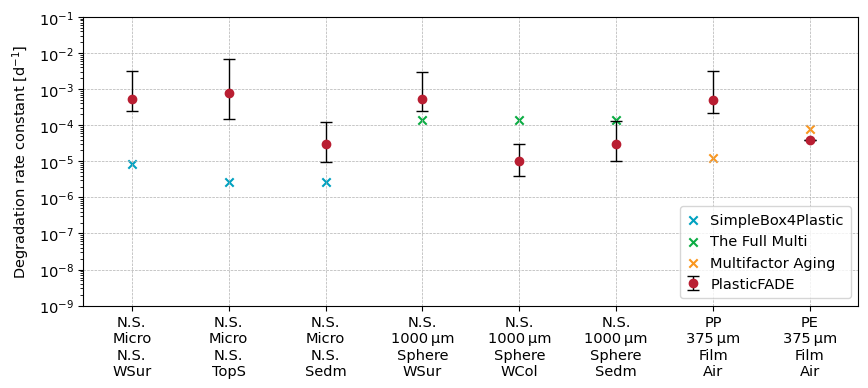

In [73]:
# Plot PlasticFADE outputs together with estimates from existing models (Degradation)
fig, ax = plt.subplots(figsize=(10, 3.75))
x = np.arange(len(data_frag))
y = data_degr['k_model [d-1]']
yerr_lower = y - data_degr['k_m_LL [d-1]']
yerr_upper = data_degr['k_m_UL [d-1]'] - y
yerr = [yerr_lower, yerr_upper]
y1 = data_degr['k_liter [d-1]'].iloc[0:3, ]
y2 = data_degr['k_liter [d-1]'].iloc[3:6, ]
y3 = data_degr['k_liter [d-1]'].iloc[6:8, ]

# Plot k_model with error bars
errorbar_plot = ax.errorbar(x, y, yerr=yerr, fmt='o', color='#B91E32', ecolor='black',
            elinewidth=1, capsize=4, markersize=6, label='PlasticFADE')
# Plot k_literature as blue crosses
h1 = plt.scatter(x[:3], y1, color='#00A1C0', marker='x', label='SimpleBox4Plastic')
h2 = plt.scatter(x[3:6], y2, color='#0BAC43', marker='x', label='The Full Multi')
h3 = plt.scatter(x[-2:], y3, color='#FA961E', marker='x', label='Multifactor Aging')

ax.set_xticks(x)
labels = data_degr['Model input'].str.replace(', ', '\n').str.replace(' ', '\u2009')
ax.set_xticklabels(labels)
ax.set_yscale('log')
ax.set_ylabel('Degradation rate constant [d$^{-1}$]', labelpad=5, fontsize=10.5)
ax.tick_params(axis='both', which='major', labelsize=10.5)
plt.xlim(-0.5, len(x) - 0.5)  # Pull the first and last data points closer to the edge of the plot
plt.ylim(1e-9, 1e-1)  # Set y-axis limits manually
plt.grid(True, which="major", ls="--", lw=0.5)

handles = [h1, h2, h3]
all_handles = handles + [errorbar_plot]
ax.legend(handles=all_handles, handlelength=0.8, borderpad=0.5, loc='lower right', fontsize=10.5)
plt.savefig("/Users/elchulito/Fig.5_DEGR.png", dpi=600, bbox_inches='tight')  # CHECK: confirm name and desired place for the plot
plt.show()